# Dataset Sales

## Análise Exploratória

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from scipy.stats import ttest_ind

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Load Dataset “1991_U.S._General_Social_Survey" after removing columns
sales_data = pd.read_excel("/content/drive/MyDrive/7.Quantitative and Statistical Analysis & Modeling/Exercicio Final.xlsx")

In [9]:
sales_data.head()

,Loja,Cidade,DATA,SUM(ITENS),SUM(VALOR)
0,261,Porto,2022-01-04,3438,6825.08
1,261,Porto,2022-01-19,3645,6614.07
2,261,Porto,2022-01-23,4432,8300.36
3,261,Porto,2022-01-28,3773,7316.09
4,261,Porto,2022-02-14,3861,7015.80


In [10]:
# Dataframe tem 26181 linhas (observações ou compras) e 5 colunas (features) - 'Loja', 'Cidade', 'Data', 'Sum(itens)' e  'Sum(valor)'.
sales_data.shape

(26181, 5)

In [11]:
#Algumas analíticas básicas
sales_data.describe()

,Loja,SUM(ITENS),SUM(VALOR)
count,26181.000000,26181.000000,2.618100e+04
mean,783.129330,14632.652267,4.627598e+04
std,394.518633,17336.216371,6.323109e+04
min,24.000000,2.000000,3.160000e+00
25%,464.000000,2558.000000,4.750670e+03
50%,907.000000,4305.000000,8.652160e+03
75%,946.000000,24021.000000,7.520785e+04
max,1601.000000,174923.000000,1.208200e+06


In [12]:
#Sem nulos
sales_data.isnull().sum().sort_values(ascending=False)

Loja          0
Cidade        0
DATA          0
SUM(ITENS)    0
SUM(VALOR)    0
dtype: int64

In [13]:
#Número de vendas por cidade
sales_data['Cidade'].value_counts()

Porto                6861
Lisboa               5590
Vila Nova de Gaia    4284
Faro                 3378
Aveiro               3212
Braga                2142
Coimbra               357
Beja                  357
Name: Cidade, dtype: int64

In [15]:
#Cidades no dataframe
sorted(sales_data['Cidade'].unique())

['Aveiro',
 'Beja',
 'Braga',
 'Coimbra',
 'Faro',
 'Lisboa',
 'Porto',
 'Vila Nova de Gaia']

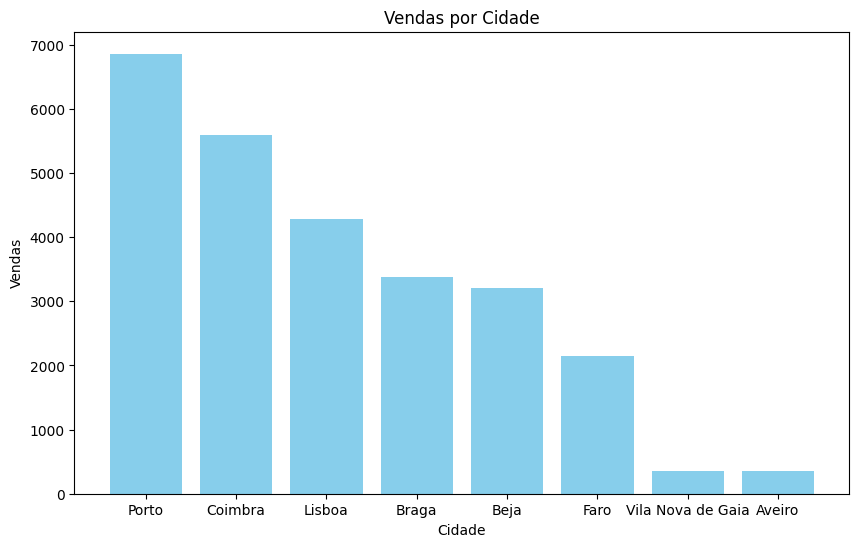

In [22]:
#Bar chart de vendas por Cidade
plt.figure(figsize=(10, 6))
plt.bar(sales_data['Cidade'].unique(), sales_data['Cidade'].value_counts(), color='skyblue')
plt.title('Vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Vendas')
plt.show()

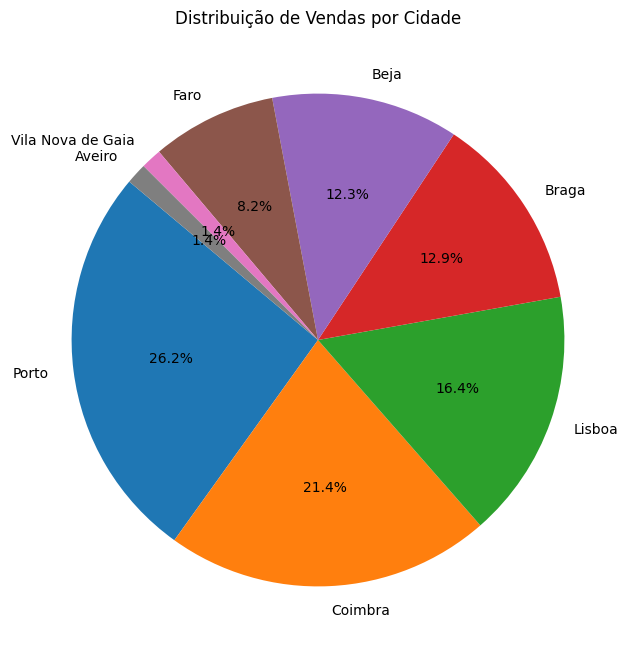

In [23]:
#Pie chart de vendas por Cidade
plt.figure(figsize=(8, 8))
plt.pie(sales_data['Cidade'].value_counts(), labels=sales_data['Cidade'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Vendas por Cidade')
plt.show()

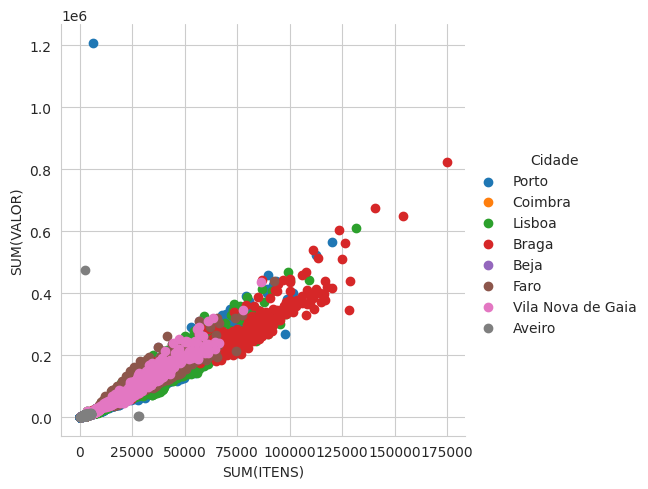

In [24]:
sns.set_style('whitegrid')
sns.FacetGrid(sales_data, hue='Cidade', height=5).map(plt.scatter, 'SUM(ITENS)', 'SUM(VALOR)').add_legend()
plt.show()

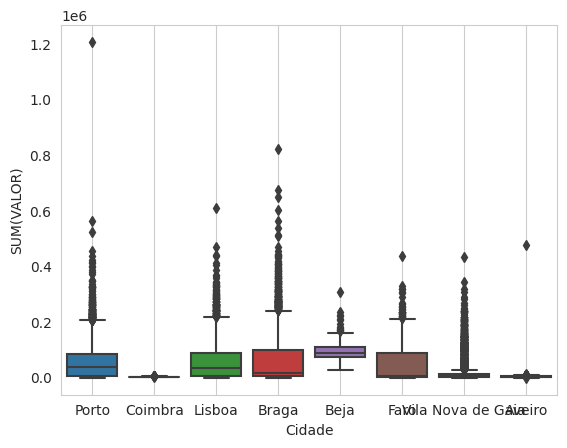

In [25]:
sns.boxplot(x='Cidade',y='SUM(VALOR)',data=sales_data, orient='v')
plt.grid()
plt.show()

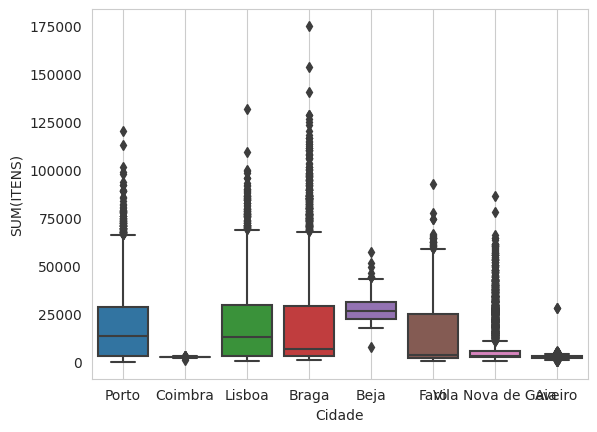

In [26]:
sns.boxplot(x='Cidade',y='SUM(ITENS)',data=sales_data)
plt.grid()
plt.show()

<Axes: xlabel='DATA', ylabel='SUM(VALOR)'>

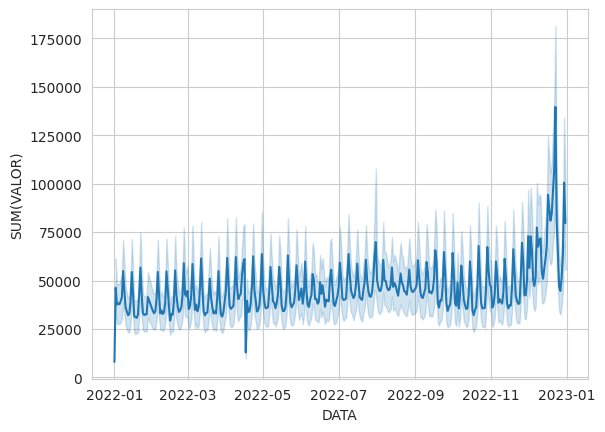

In [27]:
#Vendas ao longo do ano
sns.lineplot(sales_data, x='DATA', y='SUM(VALOR)')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


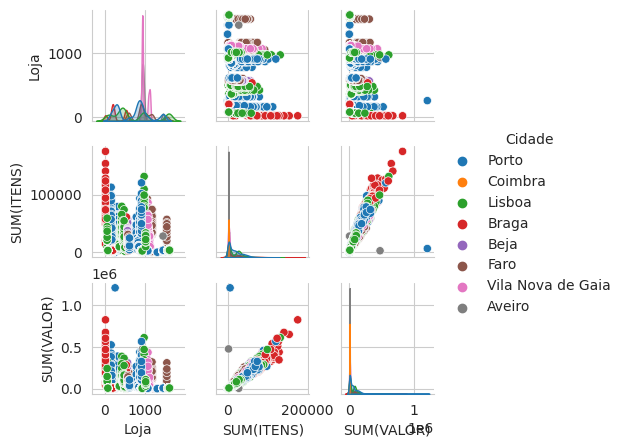

In [28]:
sns.set_style('whitegrid')
sns.pairplot(sales_data,hue='Cidade',size=1.5)
plt.show()

In [29]:
#Correlações entre variáveis
sales_data.corr()

<ipython-input-29-6d989baed1a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_data.corr()


,Loja,SUM(ITENS),SUM(VALOR)
Loja,1.000000,-0.277793,-0.257364
SUM(ITENS),-0.277793,1.000000,0.975982
SUM(VALOR),-0.257364,0.975982,1.000000


<ipython-input-30-6f46838e9c9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_data.corr(method='pearson'), annot = True);


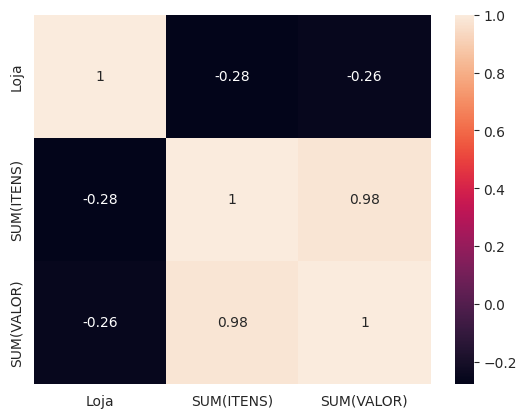

In [30]:
sns.heatmap(sales_data.corr(method='pearson'), annot = True);
plt.show()

## Análise exploratória para 'Coimbra'

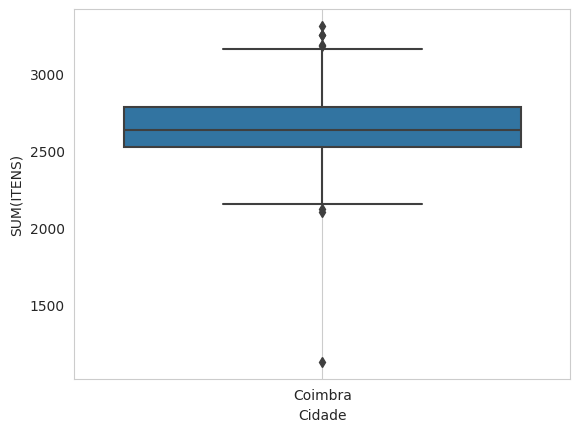

In [116]:
sns.boxplot(x=coimbra_sales_data['Cidade'],y='SUM(ITENS)',data=coimbra_sales_data)
plt.grid()
plt.show()

<Axes: xlabel='DATA', ylabel='SUM(ITENS)'>

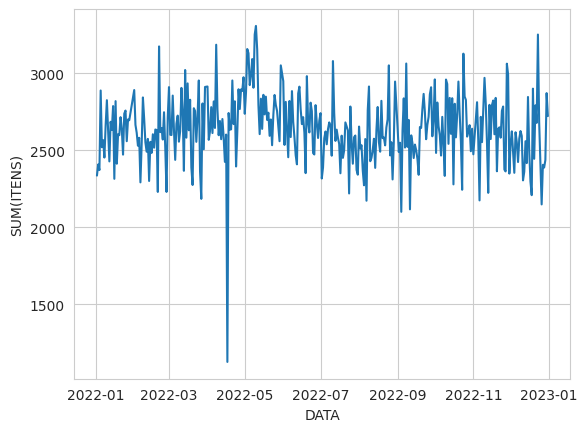

In [117]:
#Vendas ao longo do ano
sns.lineplot(coimbra_sales_data, x='DATA', y='SUM(ITENS)')

---

## Questão:

Preciso de compreender se os items medios vendidos por dia em Coimbra é superior a 2700.

1ª Etapa: Formular hipóteses

H0 (hipótese nula): média de número de items por dia vendidos em Coimbra <= 2700

H1 (hipótese alternativa): média de número de items por dia vendidos em Coimbra > 2700


Se rejeitarmos H0, significa que a média de número de items por dia vendidos em Coimbra é superior a 2700 items.

In [52]:
coimbra_sales_data = sales_data[sales_data['Cidade'] == 'Coimbra']

In [92]:
coimbra_sales_data[['SUM(ITENS)']].describe()

,SUM(ITENS)
count,357.000000
mean,2639.389356
std,224.423724
min,1127.000000
25%,2522.000000
50%,2630.000000
75%,2780.000000
max,3307.000000


In [71]:
# 1ª Etapa - Estabelecer o nível de significância de 5%
alpha = 0.05

In [108]:
# 2ª Etapa - Identificar a estatística do teste
media_teste = 2700

In [64]:
n = coimbra_sales_data.shape[0]
n

357

In [65]:
coimbra_sales_data['SUM(ITENS)'].sum()

942262

In [109]:
media_coimbra_dia = coimbra_sales_data['SUM(ITENS)'].sum() / n
media_coimbra_dia

2639.389355742297

In [110]:
desvio_padrao = np.std(coimbra_sales_data['SUM(ITENS)'])
desvio_padrao

224.10918507164868

In [111]:
z = (media_coimbra_dia - media_teste) / (desvio_padrao /  math.sqrt(n))
z

-5.1100288495497646

In [114]:
# 3ª Etapa - Determinar o valor-p
#Obtivemos o valor de 0,9978 na Tabela de distribuições normais padrão
p_value = 1 - 0.999999839
p_value

1.6099999999852344e-07

In [115]:
# 4ª Etapa - Comparar o valor-p com o nível de significância
if p_value < alpha:
  print("Rejeitamos a Hipótese Nula.")
else:
  print("Não há evidências estatísticas para rejeitarmos a hipótese nula.")

Rejeitamos a Hipótese Nula.


## Teste de Hipóteses utilizando o Teste t -  stats.ttest_1samp


In [123]:
from scipy import stats

# Amostra
amostra = coimbra_sales_data['SUM(ITENS)']

# Valor da média a ser testado
media_hipotetica = 2700

# Teste t de uma amostra
statistic, p_value = stats.ttest_1samp(amostra, media_hipotetica, alternative='less')

# Imprimir o resultado
print("Estatística do teste z:", statistic)
print("Valor-p:", p_value)

# Tomar uma decisão com base no valor-p
alpha = 0.05
if p_value < alpha:
    print("Rejeitar a hipótese nula - há evidências estatísticas para a média de itens vendidos diariamente ser maior que 2700.")
else:
    print("Não há evidências estatísticas para a média de itens vendidos diariamente ser maior que 2700. Não rejeitar a hipótese nula.")

Estatística do teste z: -5.102866927530501
Valor-p: 2.727421511017157e-07
Rejeitar a hipótese nula - há evidências estatísticas para a média de itens vendidos diariamente ser maior que 2700.
